In [4]:
from sklearn.svm import SVR
from sklearn. decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv')

In [6]:
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [8]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainA = dfTrain[list2]
dfTestA = dfTest[list2]

In [28]:
X = dfTestA.values[:,1:13] 
Y = dfTestA.values[:,0]
sc_X2 = StandardScaler() 
X1 = sc_X2.fit_transform(X) 

Y =Y.reshape(-1,1)
Y1= sc_X2.fit_transform(Y) 

ValueError: x and y must be the same size

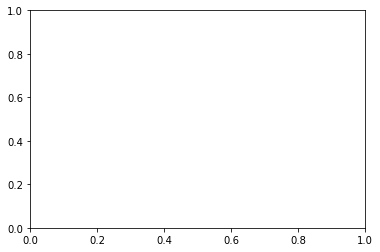

In [32]:
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin=SVR(kernel="linear", C=1e3)
svr_poly=SVR (kernel='poly', C=1e3, degree=2) 
y_rbf=svr_rbf.fit(X1, Y1).predict(X)
y_lin=svr_lin.fit(X1, Y1).predict(X)
y_poly=svr_poly.fit(X1, Y1).predict(X)


lw = 2
plt.scatter(X[:, 0],Y1, color='green',marker= '+') 
plt.scatter(X[:, 0],Y1, color='red',marker= '+')
plt.scatter(X3,Y1, color='blue',marker= '*') 
plt.plot(X, y_rbf, color='b', lw=lw, label= 'RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label="Linear model") 
plt.plot(X, y_poly, color='g', lw=lw, label='Polynomial model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
#plt.legend()
plt.show()

In [13]:
# svr rbf kernerl-
from sklearn.decomposition import PCA
MSE = []
for k in range(1,11):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60) 

  classifier = SVR(kernel = 'rbf', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)

  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1])
  print(" ")

1
0.35605040337177146
 
2
0.44628784311987424
 
3
0.5640211854166998
 
4
0.6916564320777581
 
5
0.8209680720744569
 
6
0.8336276854867765
 
7
0.8646275857620302
 
8
0.8516210993803713
 
9
0.6558236358365739
 
10
0.5591151145741349
 


(10,)


<Figure size 432x288 with 0 Axes>

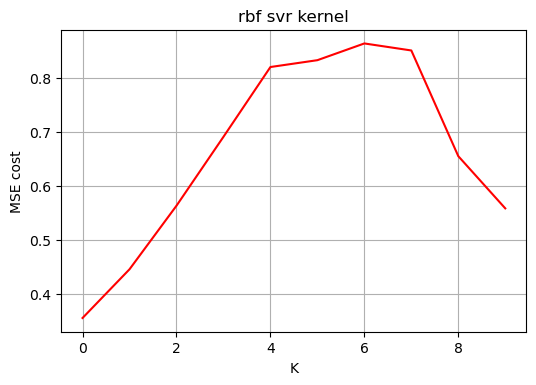

In [14]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("rbf svr kernel");

In [15]:
# svr linear kernerl-

MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60)
  classifier = SVR(kernel = 'linear', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  MSE.append(mean_squared_error(Y_test, Y_pred))
  print('k=', k)
  print(MSE[-1]) 
  print(" ")

k= 1
0.3454809293549315
 
k= 2
0.26609193627803523
 
k= 3
0.2610728659061029
 
k= 4
0.2867369282609607
 
k= 5
0.2717860112438761
 
k= 6
0.27215088016314953
 
k= 7
0.2663240139140815
 
k= 8
0.2745293473766998
 
k= 9
0.23286089905853233
 
k= 10
0.29594844887076294
 
k= 11
0.3649081213324656
 


(11,)


<Figure size 432x288 with 0 Axes>

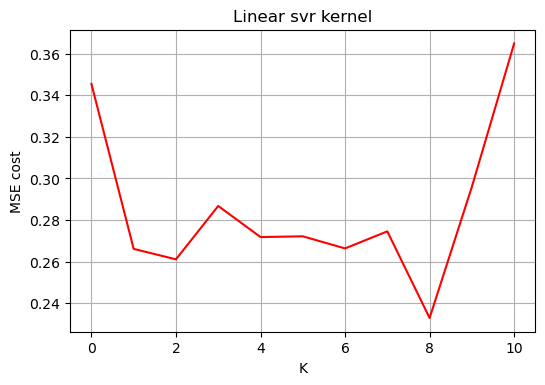

In [16]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Linear svr kernel");

In [17]:
# polynomial kernel svr

MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60) 
  classifier = SVR(kernel = 'poly', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)

  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1]) 
  print(" ")

1
0.46710128761749387
 
2
0.2736866703754007
 
3
0.46504550545124396
 
4
0.5734670483478875
 
5
0.7943166907222381
 
6
5.419216444105249
 
7
7.206740493966618
 
8
1.624612766140206
 
9
2.5725479262967776
 
10
2.385848027867583
 
11
1.1253237102152682
 


(11,)


<Figure size 432x288 with 0 Axes>

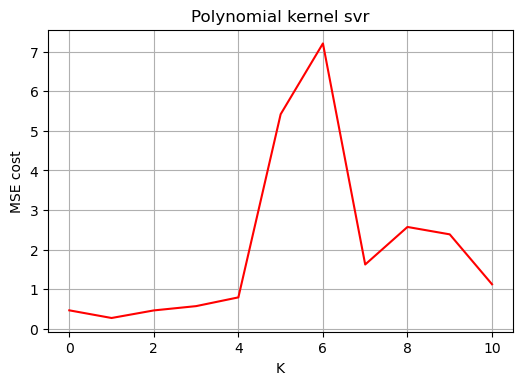

In [18]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Polynomial kernel svr");

In [19]:
# sigmoid kernel svr
MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60)
  classifier = SVR(kernel = 'sigmoid', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1]) 
  print(" ")

1
122954.86094889214
 
2
51390.31940654991
 
3
22868.92702706675
 
4
6356.36983933392
 
5
4461.569042428474
 
6
4494.636871039328
 
7
3105.122185275602
 
8
3496.1881813052346
 
9
2686.9996538213045
 
10
951.5884130317584
 
11
2492.0702175276692
 


(11,)


<Figure size 432x288 with 0 Axes>

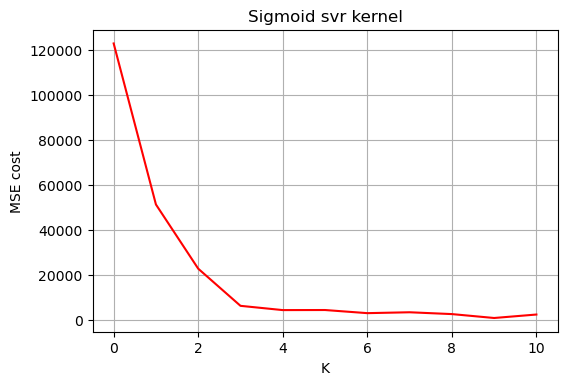

In [20]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Sigmoid svr kernel");